# Correlations

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
from scipy import stats
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score

from analysis.CodingScoring import scoreTIPI, normTIPI
plt.style.use('dark_background')

In [2]:

questions = pd.read_csv('data/External/dataHeadings.csv')
dataRaw = pd.read_csv('data/External/dataRaw.csv', names=questions.QuestionCode)
dataRaw.head()


,Start Date,End Date,DressColor,DressColorOther,DressShadow,DressShadowOther,DressLight,DressTrueColors,DressTrueColorsOther,JacketColor,...,C+,S-,O+,E-,A+,C-,S+,O-,HonestyCheck,FreeText
0,10/14/17 0:50,10/14/17 0:59,White/Gold,NaN,Yes,NaN,Artificial light,No,NaN,Other (please specify),...,Neither agree nor disagree,Agree slightly,Agree strongly,Agree slightly,Agree strongly,Agree moderately,Agree slightly,Disagree moderately,Yes,Best of luck!
1,10/14/17 0:30,10/14/17 0:40,NaN,Switches from blue/black to blue/gold,No,NaN,Artificial light,No,NaN,Other (please specify),...,Agree strongly,Agree slightly,Agree slightly,Disagree slightly,Agree moderately,Disagree strongly,Agree moderately,Disagree strongly,Yes,Hope research is going well!! Good luck!
2,10/14/17 0:00,10/14/17 0:04,Blue/Black,NaN,No,NaN,Artificial light,No,NaN,Blue and white,...,Agree slightly,Agree slightly,Agree moderately,Agree slightly,Agree slightly,Agree slightly,Agree slightly,Agree slightly,Yes,NaN
3,10/13/17 23:38,10/13/17 23:45,White/Gold,NaN,Yes,NaN,Natural light,No,NaN,Green and gold,...,Agree moderately,Disagree moderately,Agree moderately,Disagree slightly,Disagree slightly,Disagree moderately,Agree moderately,Neither agree nor disagree,Yes,I'm an engineer and would love to see the data...
4,10/13/17 23:24,10/13/17 23:30,White/Gold,NaN,No,NaN,Natural light,No,NaN,Other (please specify),...,Agree slightly,Agree slightly,Neither agree nor disagree,Agree slightly,Agree moderately,Neither agree nor disagree,Agree slightly,Agree slightly,Yes,NaN


In [3]:
df = dataRaw.join(normTIPI(scoreTIPI(dataRaw)))

## Chronotype

In [4]:
cxOCEAS = df[['Chronotype','O','C','E','A','S']]

In [5]:
m = cxOCEAS.groupby(['Chronotype']).mean()

In [6]:
m

,O,C,E,A,S
Chronotype,,,,,
Lark,-0.250813,0.451232,-0.198122,0.164111,0.188074
Owl,-0.222538,0.151161,-0.231596,0.072580,0.099233
Strong lark,-0.239012,0.596748,-0.232154,0.164584,0.223488
Strong owl,-0.062307,-0.081510,-0.247742,-0.020602,-0.042507


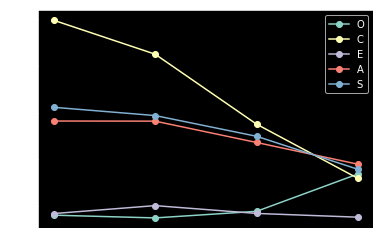

In [7]:
plt.plot(m.loc[['Strong lark','Lark','Owl','Strong owl']], marker='o')
plt.legend(['O','C','E','A','S'])

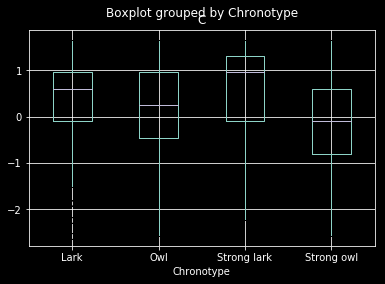

In [23]:
cxOCEAS.boxplot('C', by='Chronotype')

In [14]:
cxOCEAS['C'][cxOCEAS['Chronotype']=='Strong lark'].dropna().head()

91     0.957585
142    1.664499
150    1.664499
186    0.604128
189    1.664499
Name: C, dtype: float64

In [24]:
for trait in ['S','E','O','A','C']:
    sl = cxOCEAS[trait][cxOCEAS['Chronotype']=='Strong lark'].dropna()
    l = cxOCEAS[trait][cxOCEAS['Chronotype']=='Lark'].dropna()
    o = cxOCEAS[trait][cxOCEAS['Chronotype']=='Owl'].dropna()
    so = cxOCEAS[trait][cxOCEAS['Chronotype']=='Strong owl'].dropna()
    f_val, p_val = stats.f_oneway(sl,l,o,so)
    print('F=%f, p=%f'%(f_val,p_val))

F=42.857438, p=0.000000
F=1.638169, p=0.178211
F=30.401000, p=0.000000
F=26.590246, p=0.000000
F=300.886551, p=0.000000


In [95]:
dataRaw.columns

Index(['Start Date', 'End Date', 'DressColor', 'DressColorOther',
       'DressShadow', 'DressShadowOther', 'DressLight', 'DressTrueColors',
       'DressTrueColorsOther', 'JacketColor', 'JacketColorOther',
       'JacketShadow', 'JacketLight', 'JacketLightDirection',
       'JacketTrueColors', 'FlopColor', 'FlopColorOther', 'FlopShadow',
       'FlopLight', 'FlopTrueColors', 'Age', 'Gender', 'Ethnicity',
       'Chronotype', 'ChronotypeOther', 'FavColor', 'VisDisorder', 'E+', 'A-',
       'C+', 'S-', 'O+', 'E-', 'A+', 'C-', 'S+', 'O-', 'HonestyCheck',
       'FreeText'],
      dtype='object')

## Code OCEAS into high mid low
By standard deviation

In [108]:
cxOCEAS.head()

,Chronotype,O,C,E,A,S
0,Strong owl,6.5,3.0,4.5,4.0,4.0
1,Strong owl,6.0,7.0,5.0,4.0,4.5
2,Owl,4.5,4.0,4.0,3.5,4.0
3,Lark,5.0,6.0,4.0,2.5,6.0
4,Lark,3.5,4.5,2.5,5.5,4.0


In [25]:
cxOCEAS[['E','A','C','S','O']].describe()

,E,A,C,S,O
count,16495.000000,16430.000000,16437.000000,16463.000000,16481.000000
mean,-0.223053,0.083562,0.220115,0.101507,-0.186079
std,1.062520,0.998884,0.963992,1.015286,0.981983
min,-1.863812,-3.025773,-2.576983,-2.270539,-3.957682
25%,-1.232139,-0.578990,-0.456242,-0.580093,-0.884811
50%,-0.284631,0.236604,0.250672,0.096085,-0.006848
75%,0.662877,1.052198,0.957585,1.110352,0.432133
max,1.926221,1.867792,1.664499,1.786531,1.310097


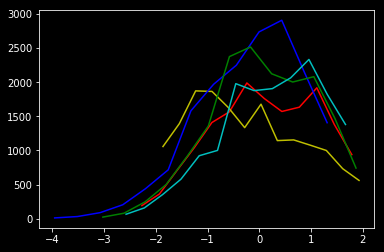

In [26]:
i=0
colors = ['r','y','b','g','c']
for trait in ['S','E','O','A','C']:
    plt.plot(cxOCEAS[trait].value_counts().sort_index(),color=colors[i])
    i+=1

In [6]:
# df = pd.DataFrame(np.load('TIPI_scored_normed_OCEAN.npy'), columns=['O','C','E','A','N'])
cxOCEAS[['O','C','E','A','S']] = normTIPI(cxOCEAS)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [27]:
cxOCEAS['N'] = 0-cxOCEAS['S']
df = cxOCEAS.drop(columns=['S'])
df.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Chronotype,O,C,E,A,N
0,Strong owl,0.871115,-1.163156,0.347041,-0.578990,0.242004
1,Strong owl,0.432133,1.664499,0.662877,-0.578990,-0.096085
2,Owl,-0.884811,-0.456242,0.031205,-0.986787,0.242004
3,Lark,-0.445830,0.957585,0.031205,-1.802382,-1.110352
4,Lark,-1.762774,-0.102785,-0.916303,0.644401,0.242004


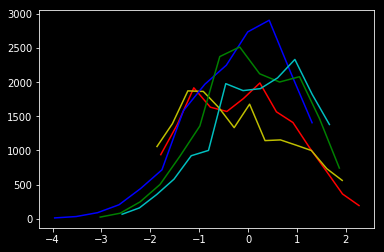

In [28]:
i=0
colors = ['r','y','b','g','c']
for trait in ['N','E','O','A','C']:
    plt.plot(cxOCEAS[trait].value_counts().sort_index(),color=colors[i])
    i+=1

Code traits into low mid high based on standard deviation

In [29]:
# df = df.drop(columns=['N_strat','E_strat','O_strat','A_strat','C_strat'])
df = cxOCEAS[['Chronotype','N','E','O','A','C']].dropna()
for trait in ['N','E','O','A','C']:
    df['%s_strat'%trait]=0
    df['%s_strat'%trait].loc[df[trait]<-1] = 1
    df['%s_strat'%trait].loc[df[trait]>1] = 3
    df['%s_strat'%trait].loc[df['%s_strat'%trait]==0] = 2
df.head()

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Chronotype,N,E,O,A,C,N_strat,E_strat,O_strat,A_strat,C_strat
0,Strong owl,0.242004,0.347041,0.871115,-0.578990,-1.163156,2,2,2,2,1
1,Strong owl,-0.096085,0.662877,0.432133,-0.578990,1.664499,2,2,2,2,3
2,Owl,0.242004,0.031205,-0.884811,-0.986787,-0.456242,2,2,2,2,2
3,Lark,-1.110352,0.031205,-0.445830,-1.802382,0.957585,1,2,2,1,2
4,Lark,0.242004,-0.916303,-1.762774,0.644401,-0.102785,2,2,1,2,2


In [71]:
df.head()

,N,E,O,A,C,N_strat,E_strat,O_strat,A_strat,C_strat
0,0.242004,0.347041,0.871115,-0.578990,-1.163156,2,2,2,2,1
1,-0.096085,0.662877,0.432133,-0.578990,1.664499,2,2,2,2,3
2,0.242004,0.031205,-0.884811,-0.986787,-0.456242,2,2,2,2,2
3,-1.110352,0.031205,-0.445830,-1.802382,0.957585,1,2,2,1,2
4,0.242004,-0.916303,-1.762774,0.644401,-0.102785,2,2,1,2,2


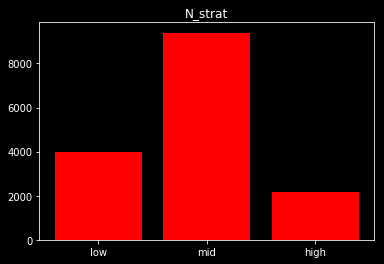

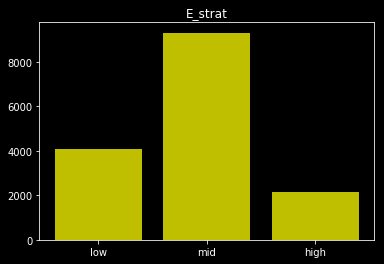

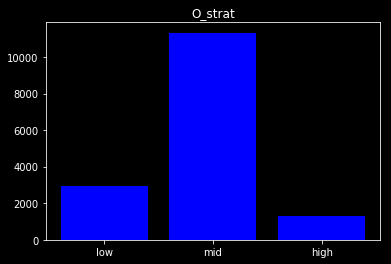

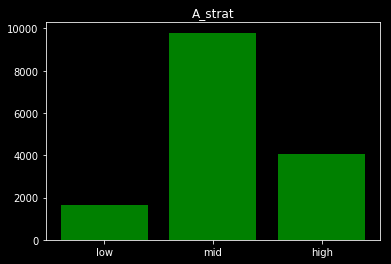

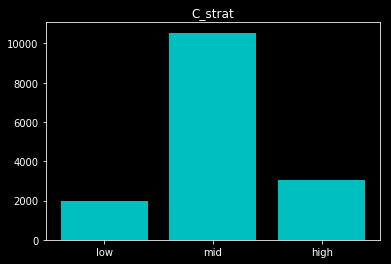

In [30]:
i=0
colors = ['r','y','b','g','c']
for trait in ['N_strat','E_strat','O_strat','A_strat','C_strat']:
    plt.figure(i)
    plt.title(trait)
    plt.bar(x=['low','mid','high'],height=df[trait].value_counts().sort_index(),color=colors[i])
    i+=1

Bisect traits along the mean a la MBTI

In [31]:
# df = df.drop(columns=['N_bistrat','E_bistrat','O_bistrat','A_bistrat','C_bistrat'])
for trait in ['N','E','O','A','C']:
    df['%s_bistrat'%trait]=0
    df['%s_bistrat'%trait].loc[df[trait]<0] = 1
    df['%s_bistrat'%trait].loc[df[trait]>0] = 3
df.head()

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Chronotype,N,E,O,A,C,N_strat,E_strat,O_strat,A_strat,C_strat,N_bistrat,E_bistrat,O_bistrat,A_bistrat,C_bistrat
0,Strong owl,0.242004,0.347041,0.871115,-0.578990,-1.163156,2,2,2,2,1,3,3,3,1,1
1,Strong owl,-0.096085,0.662877,0.432133,-0.578990,1.664499,2,2,2,2,3,1,3,3,1,3
2,Owl,0.242004,0.031205,-0.884811,-0.986787,-0.456242,2,2,2,2,2,3,3,1,1,1
3,Lark,-1.110352,0.031205,-0.445830,-1.802382,0.957585,1,2,2,1,2,1,3,1,1,3
4,Lark,0.242004,-0.916303,-1.762774,0.644401,-0.102785,2,2,1,2,2,3,1,1,3,1


In [32]:
df.loc[df['N_bistrat']==0]

,Chronotype,N,E,O,A,C,N_strat,E_strat,O_strat,A_strat,C_strat,N_bistrat,E_bistrat,O_bistrat,A_bistrat,C_bistrat


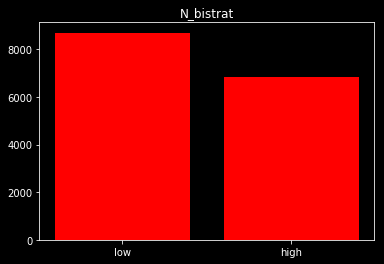

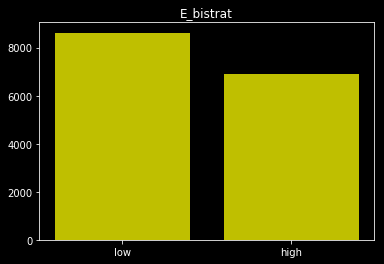

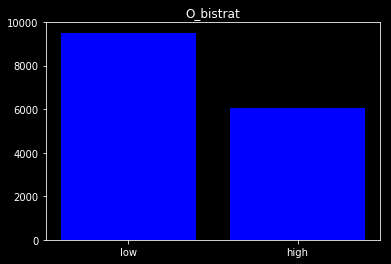

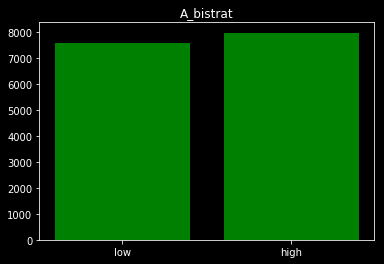

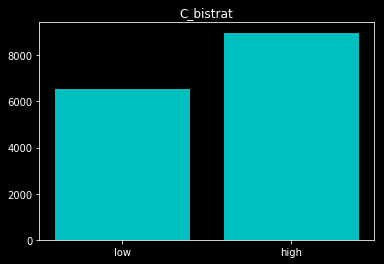

In [33]:
i=0
colors = ['r','y','b','g','c']
for trait in ['N_bistrat','E_bistrat','O_bistrat','A_bistrat','C_bistrat']:
    plt.figure(i)
    plt.title(trait)
    plt.bar(x=['low','high'],height=df[trait].value_counts().sort_index(),color=colors[i])
    i+=1

In [34]:
df.tail()

,Chronotype,N,E,O,A,C,N_strat,E_strat,O_strat,A_strat,C_strat,N_bistrat,E_bistrat,O_bistrat,A_bistrat,C_bistrat
16696,Owl,-0.434174,1.294549,0.432133,-0.171193,-0.809699,2,3,2,2,2,1,3,3,1,1
16697,Lark,-0.772263,0.347041,-0.884811,1.052198,0.250672,2,2,2,3,2,1,3,1,3,3
16698,Owl,-1.110352,-1.863812,-0.006848,0.644401,1.664499,1,1,2,2,3,1,1,1,3,3
16699,Owl,2.270539,-0.916303,-0.445830,-0.171193,-0.456242,3,2,2,2,2,3,1,1,1,1
16700,Lark,1.256272,0.031205,-0.884811,-2.210179,-0.456242,3,2,2,1,2,3,3,1,1,1


## Chi square tests on stratified data

In [35]:
pd.crosstab(index=df['C_strat'],columns=df['Chronotype'])

Chronotype,Lark,Owl,Strong lark,Strong owl
C_strat,,,,
1,309,805,86,769
2,3033,4329,741,2440
3,1111,998,441,477


In [36]:
x = pd.crosstab(index=df['C_strat'],columns=df['Chronotype'])
x.values

array([[ 309,  805,   86,  769],
       [3033, 4329,  741, 2440],
       [1111,  998,  441,  477]])

In [37]:
stats.chi2_contingency(x.values)

(705.2545580088133,
 4.487283988365978e-149,
 6,
 array([[ 564.25490701,  777.00675719,  160.67263016,  467.06570564],
        [3021.2998906 , 4160.47853787,  860.32074136, 2500.90083017],
        [ 867.44520239, 1194.51470494,  247.00662848,  718.03346419]]))

In [38]:
x = pd.crosstab(index=df['C_bistrat'],columns=df['Chronotype'])
stats.chi2_contingency(x.values)

(568.0008088295247,
 8.711012477230626e-123,
 3,
 array([[1878.46161272, 2586.73402407,  534.89542442, 1554.9089388 ],
        [2574.53838728, 3545.26597593,  733.10457558, 2131.0910612 ]]))

## Regressions

In [53]:
df = df.replace(['Strong owl','Owl','Lark','Strong lark'],[1,2,3,4])

In [54]:
df.head()

,Chronotype,N,E,O,A,C,N_strat,E_strat,O_strat,A_strat,C_strat,N_bistrat,E_bistrat,O_bistrat,A_bistrat,C_bistrat
0,1,0.242004,0.347041,0.871115,-0.578990,-1.163156,2,2,2,2,1,3,3,3,1,1
1,1,-0.096085,0.662877,0.432133,-0.578990,1.664499,2,2,2,2,3,1,3,3,1,3
2,2,0.242004,0.031205,-0.884811,-0.986787,-0.456242,2,2,2,2,2,3,3,1,1,1
3,3,-1.110352,0.031205,-0.445830,-1.802382,0.957585,1,2,2,1,2,1,3,1,1,3
4,3,0.242004,-0.916303,-1.762774,0.644401,-0.102785,2,2,1,2,2,3,1,1,3,1


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


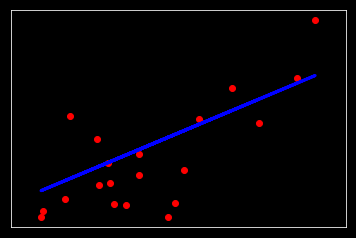

In [56]:
# built in diabetes dataset example regression
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='r')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [101]:
testN = 500
consc_X_test = df['C'].values.reshape(-1,1)[-1*testN:]
consc_X_train = df['C'].values.reshape(-1,1)[:-1*testN]

In [102]:
chron_Y_test = df['Chronotype'].values.reshape(-1,1)[-1*testN:]
chron_Y_train = df['Chronotype'].values.reshape(-1,1)[:-1*testN]

In [76]:
reg = linear_model.LinearRegression()

In [103]:
reg.fit(consc_X_train,chron_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
chron_Y_pred = reg.predict(consc_X_test)

Coefficients: 
 [938.23786125]
Mean squared error: 0.861
Variance score: 0.024


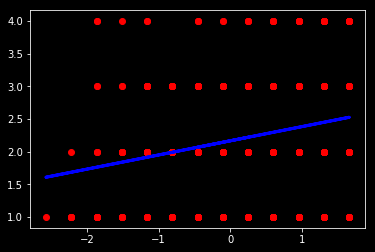

In [105]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.3f" % mean_squared_error(chron_Y_test, chron_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(chron_Y_test, chron_Y_pred))

# Plot outputs
plt.scatter(consc_X_test, chron_Y_test,  color='r')
plt.plot(consc_X_test, chron_Y_pred, color='blue', linewidth=3)

### Tri-strat

In [95]:
consc_X_test = df['C_strat'].values.reshape(-1,1)[-1*testN:]
consc_X_train = df['C_strat'].values.reshape(-1,1)[:-1*testN]

In [96]:
reg.fit(consc_X_train,chron_Y_train)
chron_Y_pred = reg.predict(consc_X_test)

Coefficients: 
 [938.23786125]
Mean squared error: 0.868
Variance score: 0.016


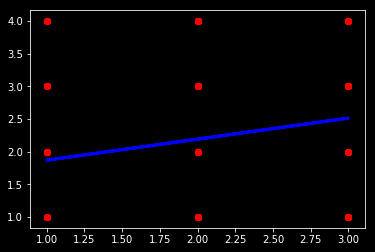

In [97]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.3f" % mean_squared_error(chron_Y_test, chron_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(chron_Y_test, chron_Y_pred))

# Plot outputs
plt.scatter(consc_X_test, chron_Y_test,  color='r')
plt.plot(consc_X_test, chron_Y_pred, color='blue', linewidth=3)

### Bi-strat

In [90]:
consc_X_test = df['C_bistrat'].values.reshape(-1,1)[-1*testN:]
consc_X_train = df['C_bistrat'].values.reshape(-1,1)[:-1*testN]

In [91]:
reg.fit(consc_X_train,chron_Y_train)
chron_Y_pred = reg.predict(consc_X_test)

Coefficients: 
 [938.23786125]
Mean squared error: 0.872
Variance score: 0.011


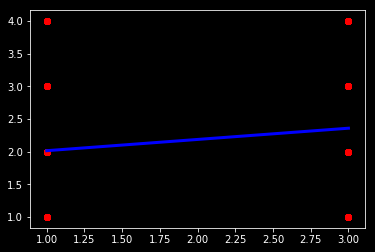

In [93]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.3f" % mean_squared_error(chron_Y_test, chron_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(chron_Y_test, chron_Y_pred))

# Plot outputs
plt.scatter(consc_X_test, chron_Y_test,  color='r')
plt.plot(consc_X_test, chron_Y_pred, color='blue', linewidth=3)

### Multi

In [107]:
df[['C','O']].values

array([[-1.16315566,  0.87111501],
       [ 1.6644988 ,  0.43213345],
       [-0.45624205, -0.88481124],
       ...,
       [ 1.6644988 , -0.00684811],
       [-0.45624205, -0.44582968],
       [-0.45624205, -0.88481124]])

In [108]:
consc_X_test = df[['O','C','E','A','N']].values[-1*testN:]
consc_X_train = df[['O','C','E','A','N']].values[:-1*testN]

In [109]:
reg.fit(consc_X_train,chron_Y_train)
chron_Y_pred = reg.predict(consc_X_test)

Coefficients: 
 [938.23786125]
Mean squared error: 0.848
Variance score: 0.038


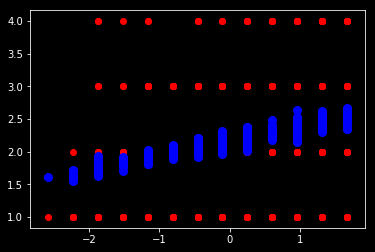

In [118]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.3f" % mean_squared_error(chron_Y_test, chron_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(chron_Y_test, chron_Y_pred))

# Plot outputs
plt.scatter(consc_X_test[:,1], chron_Y_test,  color='r')
plt.scatter(consc_X_test[:,1], chron_Y_pred, color='blue', linewidth=3)

In [125]:
consc_X_test = df[['N_strat','E_strat','O_strat','A_strat','C_strat']].values[-1*testN:]
consc_X_train = df[['N_strat','E_strat','O_strat','A_strat','C_strat']].values[:-1*testN]

In [122]:
consc_X_test = df[['N_bistrat','E_bistrat','O_bistrat','A_bistrat','C_bistrat']].values[-1*testN:]
consc_X_train = df[['N_bistrat','E_bistrat','O_bistrat','A_bistrat','C_bistrat']].values[:-1*testN]

In [126]:
reg.fit(consc_X_train,chron_Y_train)
chron_Y_pred = reg.predict(consc_X_test)

Coefficients: 
 [938.23786125]
Mean squared error: 0.854
Variance score: 0.032


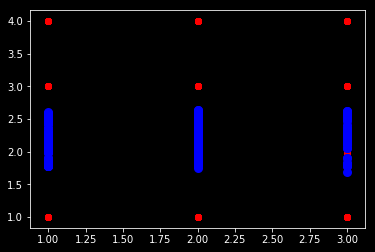

In [127]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.3f" % mean_squared_error(chron_Y_test, chron_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(chron_Y_test, chron_Y_pred))

# Plot outputs
plt.scatter(consc_X_test[:,1], chron_Y_test,  color='r')
plt.scatter(consc_X_test[:,1], chron_Y_pred, color='blue', linewidth=3)

In [128]:
.032/.038
# tri strat method accounts for 84% of the variance that a continuous OCEAN model does

0.8421052631578948

## Logistic

In [129]:
reg_l = linear_model.LogisticRegression()

In [138]:
consc_X_test = df['C'].values.reshape(-1,1)[-1*testN:]
consc_X_train = df['C'].values.reshape(-1,1)[:-1*testN]

In [131]:
consc_X_test = df[['O','C','E','A','N']].values[-1*testN:]
consc_X_train = df[['O','C','E','A','N']].values[:-1*testN]

In [132]:
chron_Y_test = df['Chronotype'].values.reshape(-1,1)[-1*testN:]
chron_Y_train = df['Chronotype'].values.reshape(-1,1)[:-1*testN]

In [146]:
reg_l.fit(consc_X_train,chron_Y_train)
chron_Y_pred = reg.predict(consc_X_test)

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: shapes (500,1) and (5,1) not aligned: 1 (dim 1) != 5 (dim 0)

Coefficients: 
 [938.23786125]
Mean squared error: 1.113
Variance score: -0.261


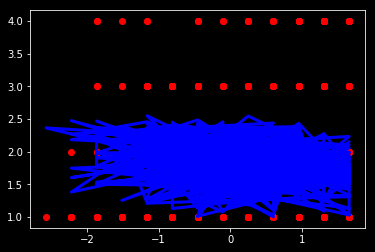

In [142]:
print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.3f" % mean_squared_error(chron_Y_test, chron_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(chron_Y_test, chron_Y_pred))

# Plot outputs
plt.scatter(consc_X_test, chron_Y_test,  color='r')
plt.plot(consc_X_test, chron_Y_pred, color='blue', linewidth=3)

In [144]:
df['C'].values.reshape(-1,1)

array([[-1.16315566],
       [ 1.6644988 ],
       [-0.45624205],
       ...,
       [ 1.6644988 ],
       [-0.45624205],
       [-0.45624205]])